In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')

In [51]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [53]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [54]:
# 6,362,620 rows

df.shape

(6362620, 11)

In [55]:
# no nulls
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [56]:
type_counts = df['type'].value_counts()
type_counts

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

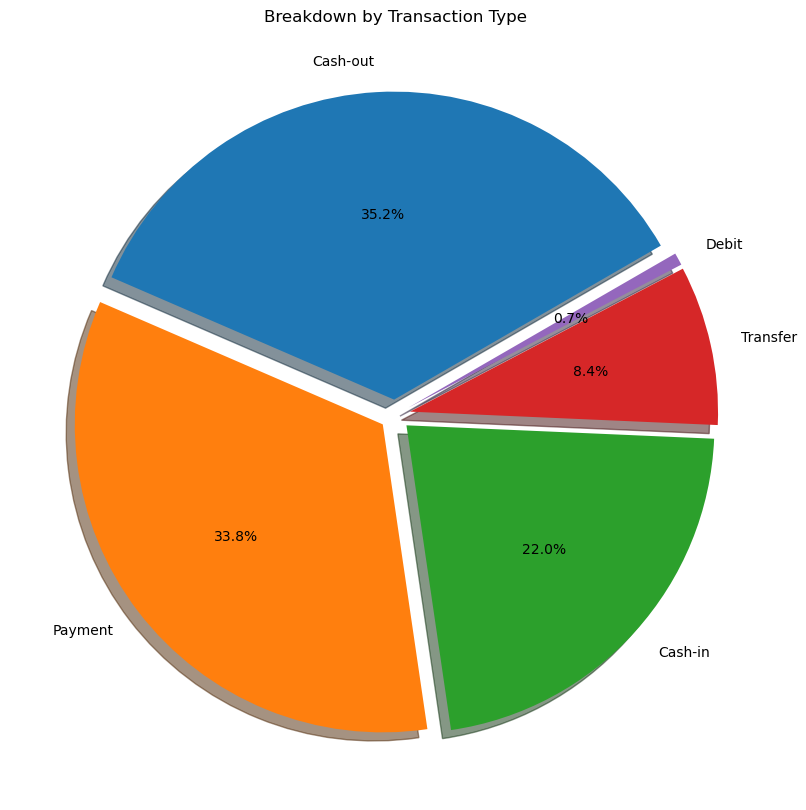

In [57]:
size = [2237500, 2151495, 1399284, 532909, 41432]
label = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Breakdown by Transaction Type')
plt.show()

## Amount distributions across transaction types

All data is heavily right skewed, log transformed all histograms

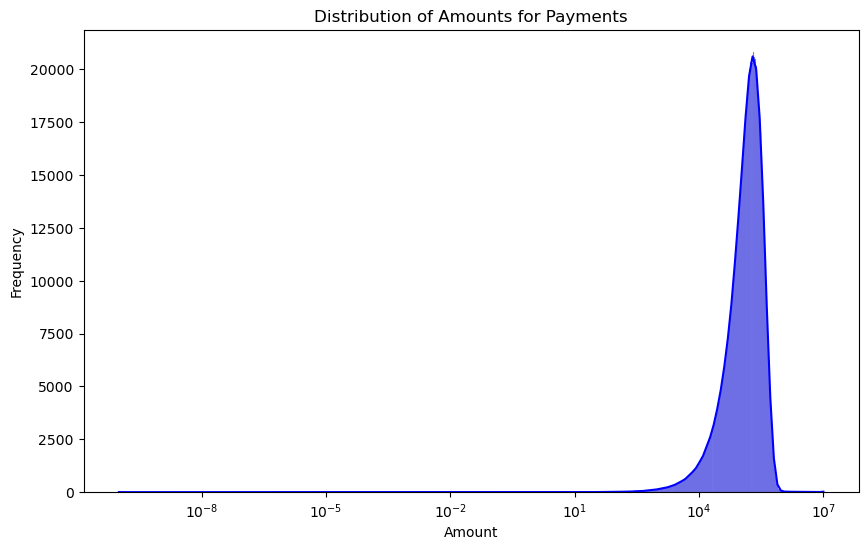

In [58]:
df_cash_out = df[df['type'] == 'CASH_OUT']

plt.figure(figsize=(10, 6))

# Create a histogram with KDE overlay
sns.histplot(df_cash_out['amount']+ 1e-10, kde=True, color='blue', log_scale=True)

plt.title('Distribution of Amounts for Payments')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

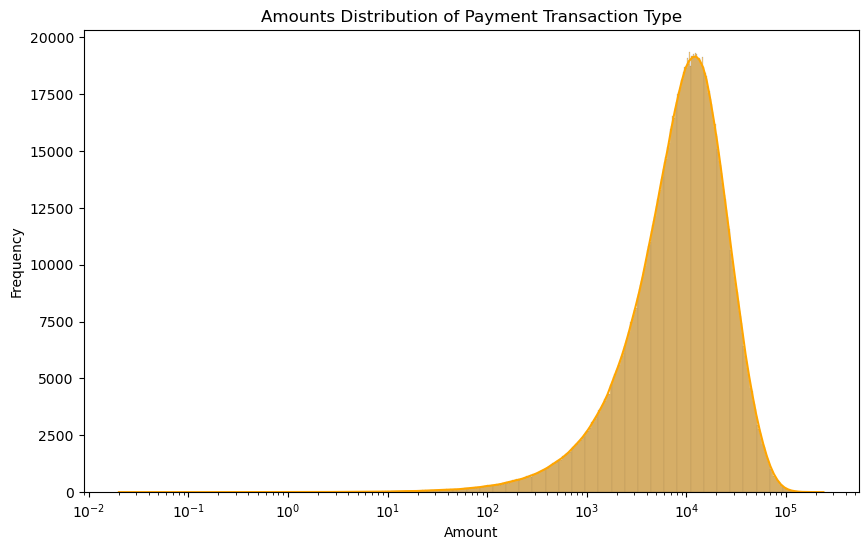

In [59]:
df_payments = df[df['type'] == 'PAYMENT']

plt.figure(figsize=(10, 6))

# Create a histogram with KDE overlay
sns.histplot(df_payments['amount'], kde=True, color='orange', log_scale=True)

plt.title('Amounts Distribution of Payment Transaction Type')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

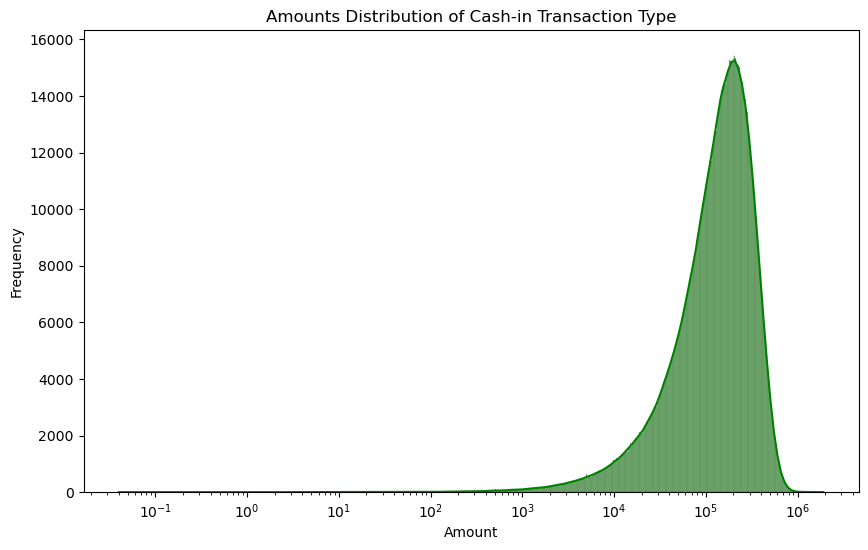

In [60]:
df_cash_in = df[df['type'] == 'CASH_IN']

plt.figure(figsize=(10, 6))

# Create a histogram with KDE overlay
sns.histplot(df_cash_in['amount'], kde=True, color='green', log_scale=True)

plt.title('Amounts Distribution of Cash-in Transaction Type')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

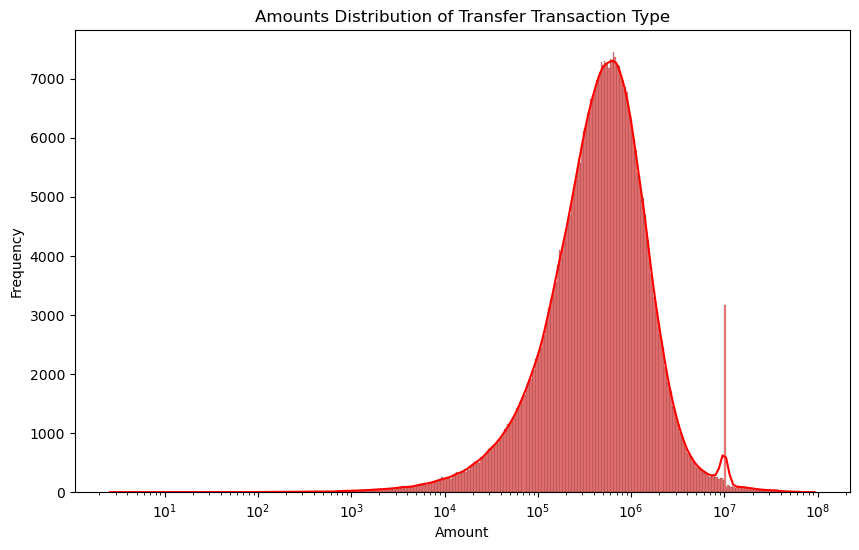

In [61]:
df_transfer = df[df['type'] == 'TRANSFER']

plt.figure(figsize=(10, 6))

# Create a histogram with KDE overlay
sns.histplot(df_transfer['amount'], kde=True, color='red', log_scale=True)

plt.title('Amounts Distribution of Transfer Transaction Type')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

We see a very high spike of transfer transactions with the amount of 10,000,000.

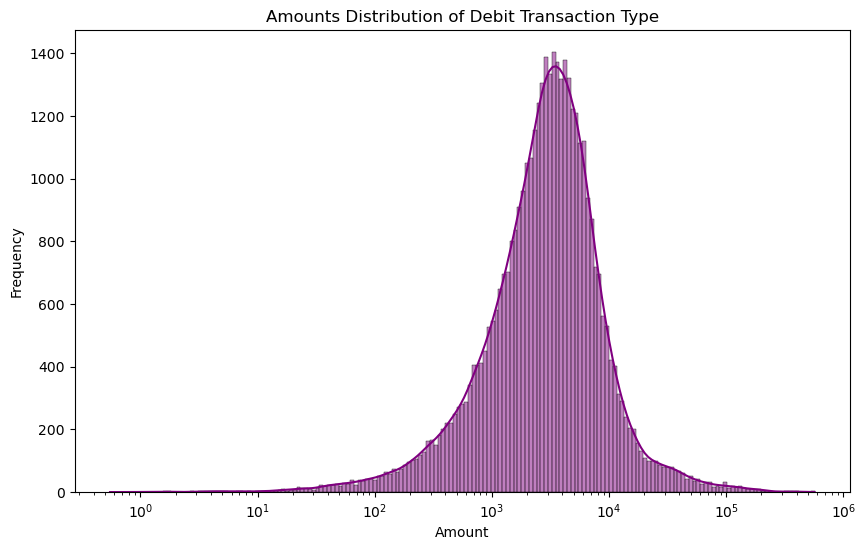

In [62]:
df_debit = df[df['type'] == 'DEBIT']

plt.figure(figsize=(10, 6))

# Create a histogram with KDE overlay
sns.histplot(df_debit['amount'], kde=True, color='purple', log_scale=True)

plt.title('Amounts Distribution of Debit Transaction Type')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Fraudulent Activity

In [63]:
fraud_proportion = df['isFraud'].value_counts(normalize=True)

In [64]:
# percentage of transactions labeled as not fraud is 99.87%
fraud_proportion[0] * 100

99.87091795518198

In [65]:
# percentage of transactions labeled as fraud is .13%
fraud_proportion[1] * 100

0.12908204481801522

In [66]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

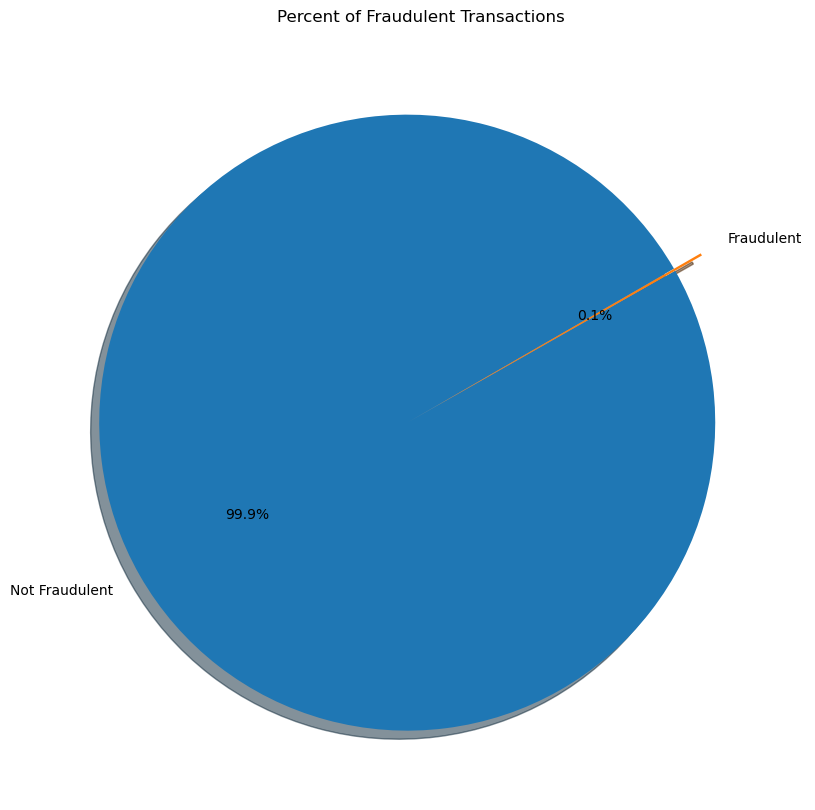

In [67]:
size = [6354407, 8213]
label = ['Not Fraudulent', 'Fraudulent']
explode = [0.05, 0.05]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Percent of Fraudulent Transactions')
plt.show()

In [68]:
# dataframe of all transactions that were labeled as fraudulent

fraudulent_activity = df[df['isFraud'] == 1]

In [69]:
fraud_by_type = fraudulent_activity['type'].value_counts()
fraud_by_type

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Fraudulent transactions are exclusively contained within CASH_OUT and TRANSFER transaction types.

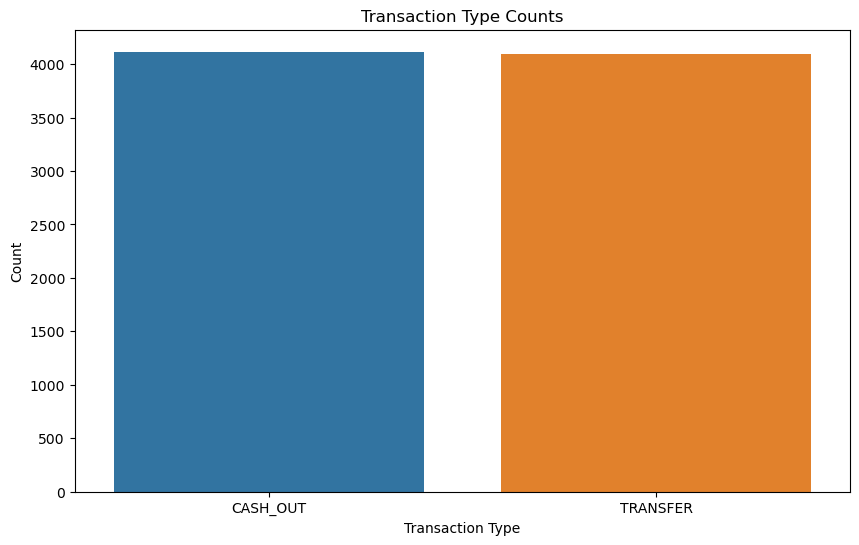

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x=fraudulent_activity['type'], order=fraud_by_type.index) 

plt.title('Transaction Type Counts')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## > 200,000 Naive Model

IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD)

In [71]:
naive_fraud_proportion = df['isFlaggedFraud'].value_counts(normalize=True)

In [72]:
# a naive model that returns fraud if amount > 200,000
# percentage of transactions labeled as not fraud with this model is 99.99%

naive_fraud_proportion[0] * 100

99.99974853126542

In [73]:
# a naive model that returns fraud if amount > 200,000
# percentage of transactions labeled as not fraud with this model is < 0.01%

naive_fraud_proportion[1] * 100

0.000251468734577894

In [74]:
naive_fraudulent_activity = df[df['isFlaggedFraud'] == 1 ]

In [75]:
naive_fraudulent_activity.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


We have 16 transactions that were flagged as potentially fraudulent by the > 200,000 amount model

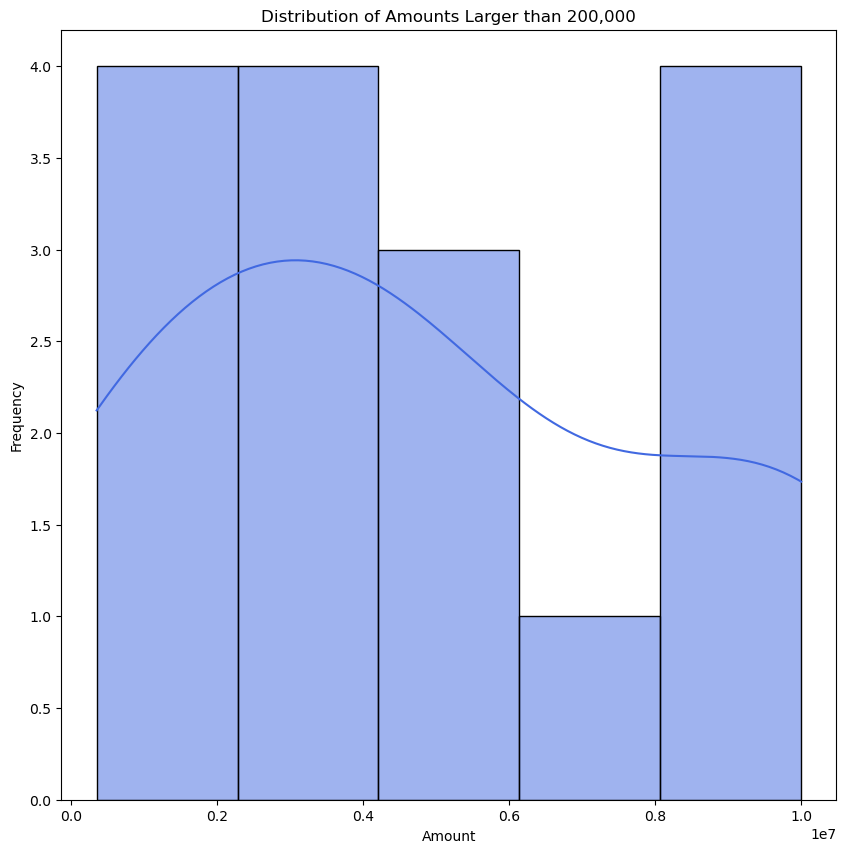

In [76]:
sns.histplot(naive_fraudulent_activity['amount'], kde=True, color='royalblue')

plt.title('Distribution of Amounts Larger than 200,000')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Majority of amounts > 200,000, are between 0.00 - 5,000,000. There is a sizable amount between 7,500,000-10,000,000 as well.

isFlaggedFraud does not appear to have captured all amounts > 200,000. Will consider dropping this column

## Outliers

In [77]:
amount_column = df['amount']

# Calculate the IQR (Interquartile Range)
Q1 = amount_column.quantile(0.25)
Q3 = amount_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the bounds
outliers = amount_column[(amount_column < lower_bound) | (amount_column > upper_bound)]

outliers

85         1505626.01
86          554026.99
88          761507.39
89         1429051.47
93          583848.46
              ...    
6362613    1258818.82
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 338078, dtype: float64

In [78]:
outliers.value_counts()

amount
10000000.00    3207
1165187.89        4
633610.66         3
567729.52         3
2108589.59        3
               ... 
1085085.46        1
544315.24         1
594532.98         1
2797313.23        1
1353261.87        1
Name: count, Length: 332418, dtype: int64

<Axes: xlabel='type', ylabel='amount'>

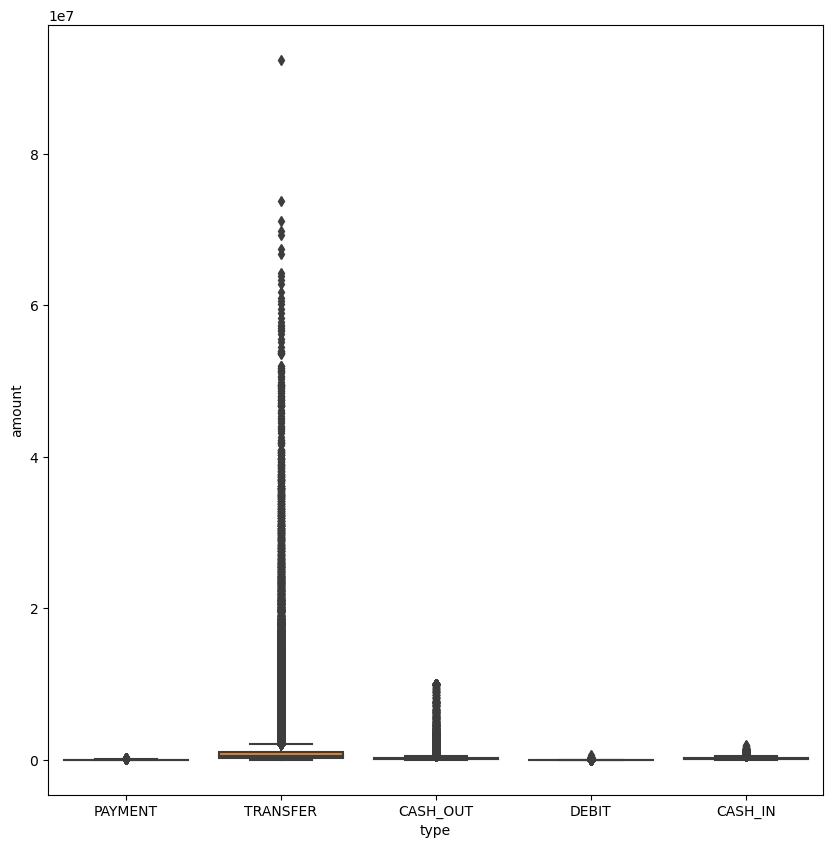

In [79]:
sns.boxplot(data=df, x='type', y='amount')

Heavily skewed data, however we can see that tranfer and cash out transactions have by far the greatest number of outliers

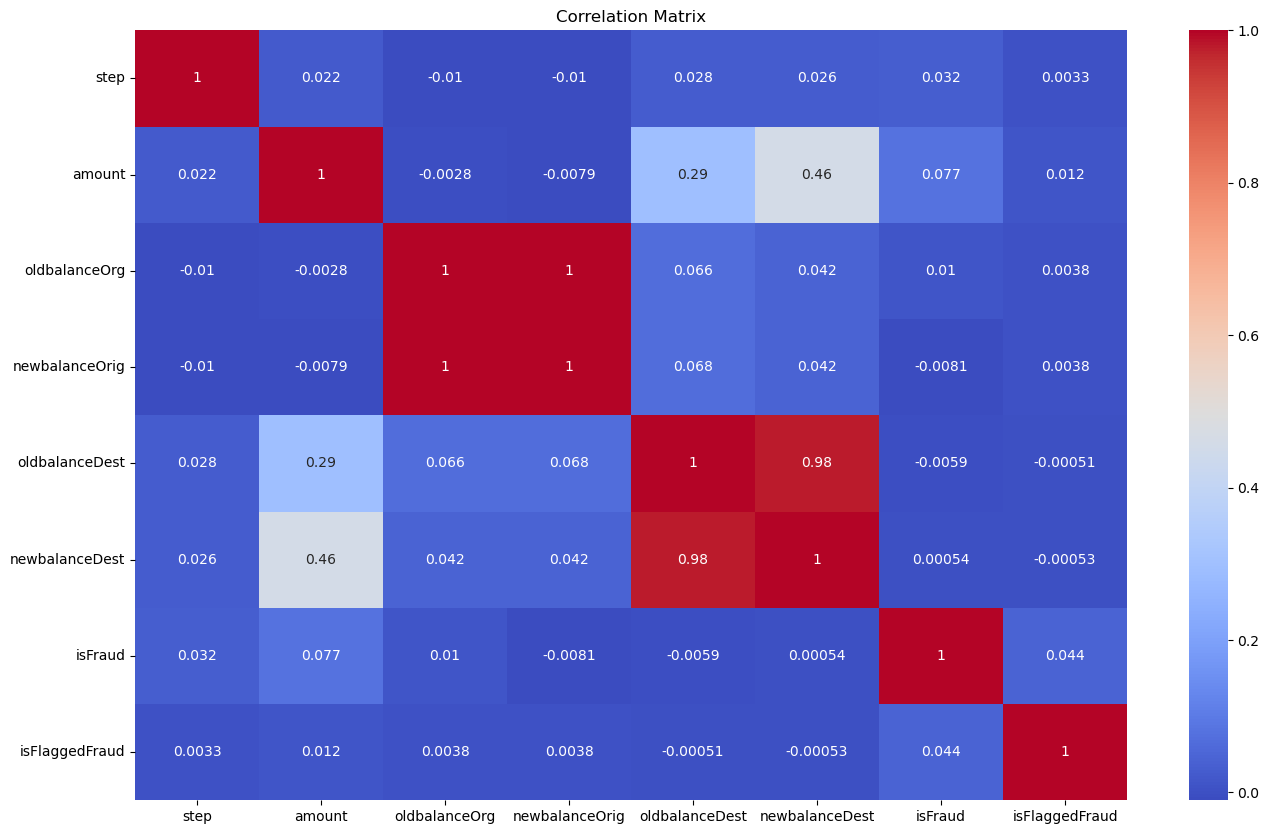

In [80]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Exploring Columns that Contain Fraud

In [81]:
df_containing_fraud = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [82]:
df_containing_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [83]:
df_containing_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [84]:
df_containing_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [85]:
df_containing_fraud.shape

(2770409, 11)

In [86]:
# reduced the size of the original dataframe by more than half
(2770409 / 6362620) * 100

43.54195284332555

In [87]:
type_counts_of_df_containing_fraud = df_containing_fraud['type'].value_counts()
type_counts_of_df_containing_fraud

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

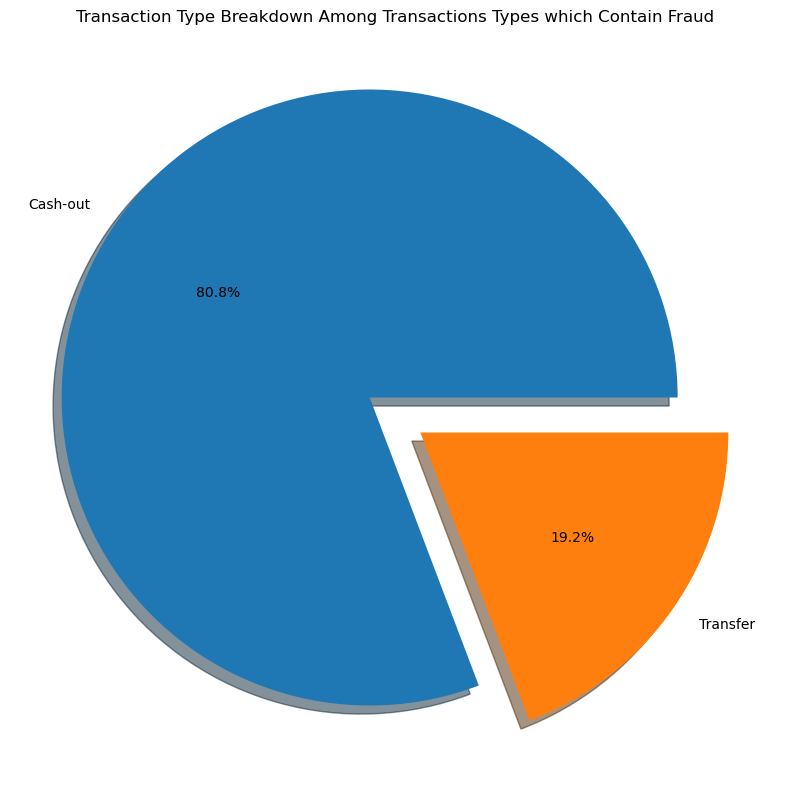

In [88]:
size = [2237500, 532909]
label = ['Cash-out', 'Transfer']
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', shadow=True)
# rename
plt.title('Transaction Type Breakdown Among Transactions Types which Contain Fraud')
plt.show()

Text(0.5, 1.0, 'Fraudulent and Non-Fraudulent Transactions by Transaction Type over Time')

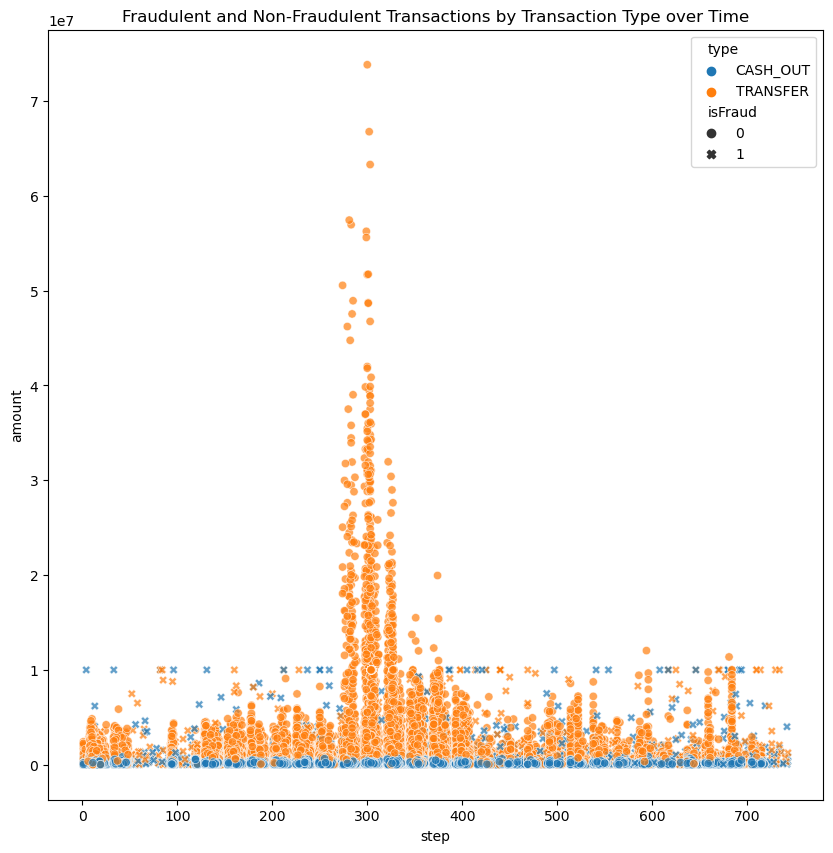

In [89]:
# creating 50000 samples
random_sample = df_containing_fraud.sample(500000, random_state=42)

# building scatterplot
sns.scatterplot(data=random_sample, x="step", y='amount', hue='type', alpha=0.7, style='isFraud')

plt.title('Fraudulent and Non-Fraudulent Transactions by Transaction Type over Time')

This chart depicts a random sample of 50000 rows from the df_containing_fraud dataframe. Types of transactions are colored by hue, fraud is marked by an X. It appears that fraudulent transactions for both cash-out and transfer transactions range from 0 - 10,000,000

### Let's take a closer look by discriminating between the two transaction types

#### First cash-out transactions

Text(0.5, 1.0, 'Fraudulent and Non-Fraudulent Cash-out Transactions over Time')

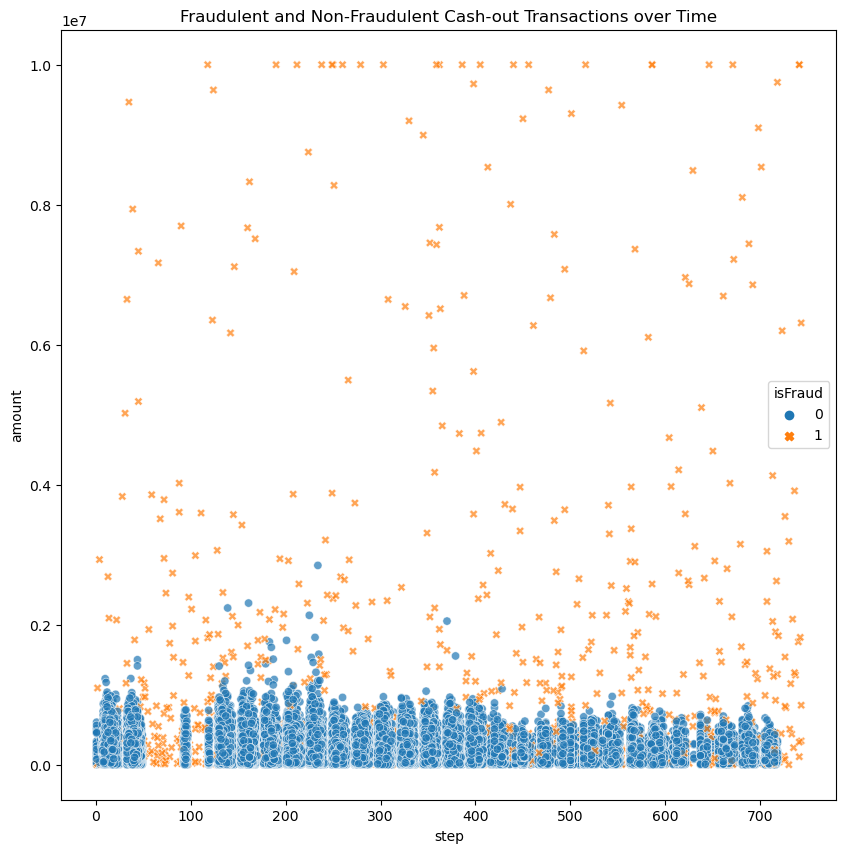

In [90]:
# seperating where type = CASH_OUT
df_containing_cash_out_fraud = df_containing_fraud[df_containing_fraud['type'] == 'CASH_OUT']

# creating 50000 samples
random_sample_cash_out = df_containing_cash_out_fraud.sample(500000, random_state=42)

# building scatterplot
sns.scatterplot(data=random_sample_cash_out, x="step", y='amount', alpha=0.7, style='isFraud', hue='isFraud')
plt.title('Fraudulent and Non-Fraudulent Cash-out Transactions over Time')

This chart depicts a random sample of 50000 rows from the df_containing_cash_out_fraud dataframe of both fraudulent and non-fraudlent cash-out transactions over time. Interestingly it appears that the majority of non-fraudulent cash-out transactions occur within a range of 0 - 1,000,000.

In [91]:
non_fraud_cash_out = df_containing_cash_out_fraud[df_containing_cash_out_fraud['isFraud'] == 0]
true_fraud_cash_out = df_containing_cash_out_fraud[df_containing_cash_out_fraud['isFraud'] == 1]

In [92]:
true_fraud_cash_out.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4116.000000,4.116000e+03,4.116000e+03,4116.000000,4.116000e+03,4.116000e+03,4116.0,4116.0
mean,367.720360,1.455103e+06,1.453869e+06,72.586883,1.084918e+06,2.549545e+06,1.0,0.0
std,216.670186,2.393842e+06,2.394506e+06,4656.888395,4.650482e+06,5.220285e+06,0.0,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.0,0.0
25%,180.000000,1.254645e+05,1.232310e+05,0.000000,0.000000e+00,3.562813e+05,1.0,0.0
50%,367.000000,4.355169e+05,4.336777e+05,0.000000,1.449701e+05,1.050828e+06,1.0,0.0
75%,558.000000,1.500761e+06,1.500761e+06,0.000000,7.947107e+05,3.013796e+06,1.0,0.0
max,743.000000,1.000000e+07,1.000000e+07,298767.610000,2.362305e+08,2.367265e+08,1.0,0.0


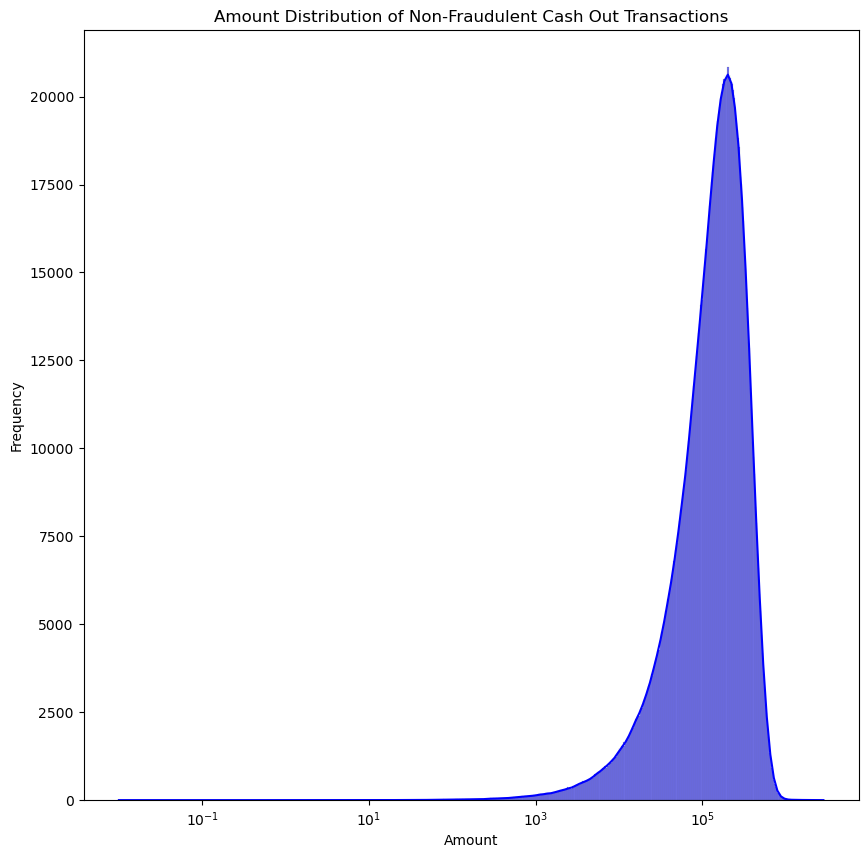

In [93]:
sns.histplot(non_fraud_cash_out['amount'], kde=True, color='blue', log_scale=True)

plt.title('Amount Distribution of Non-Fraudulent Cash Out Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

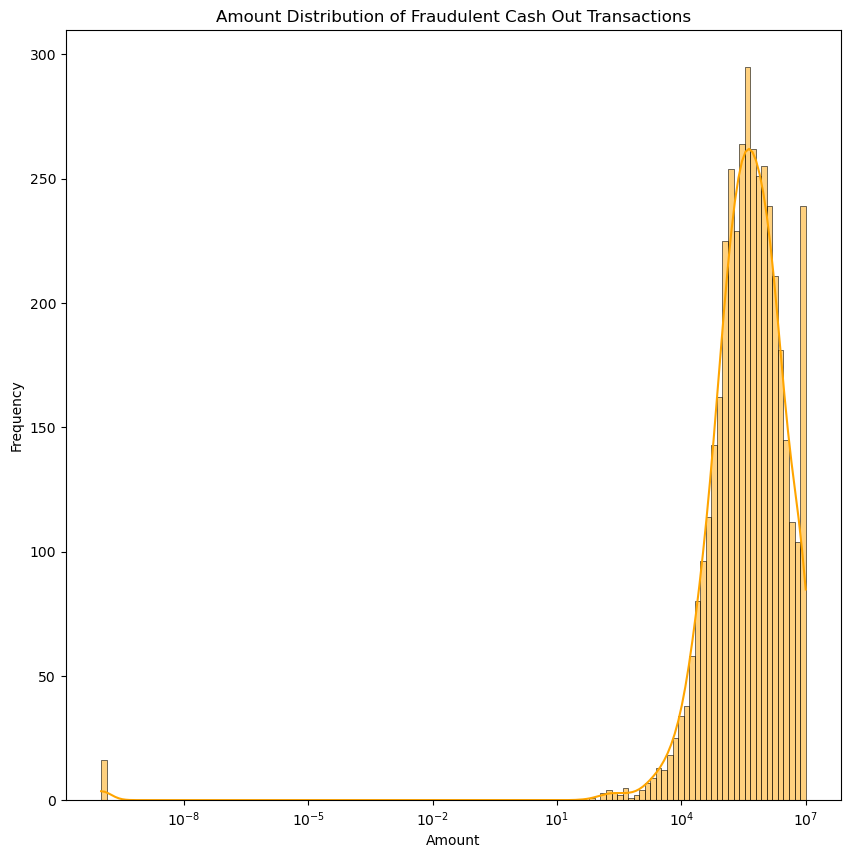

In [94]:
# added 1e-10 to avoid taking the log of 0
sns.histplot(true_fraud_cash_out['amount'] + 1e-10, kde=True, color='orange', log_scale=True)

plt.title('Amount Distribution of Fraudulent Cash Out Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Investigating the miniscule bar at the left

In [95]:
tiny_amounts = true_fraud_cash_out[true_fraud_cash_out['amount'] == 0]

In [96]:
tiny_amounts

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


Interestingly it appears that these cash-out transactions all record an amount of 0. It appears that both the origin account and destination account's balances remain unchanged.

#### Now Transfer transactions

Text(0.5, 1.0, 'Fraudulent and Non-Fraudulent Transfer Transactions over Time')

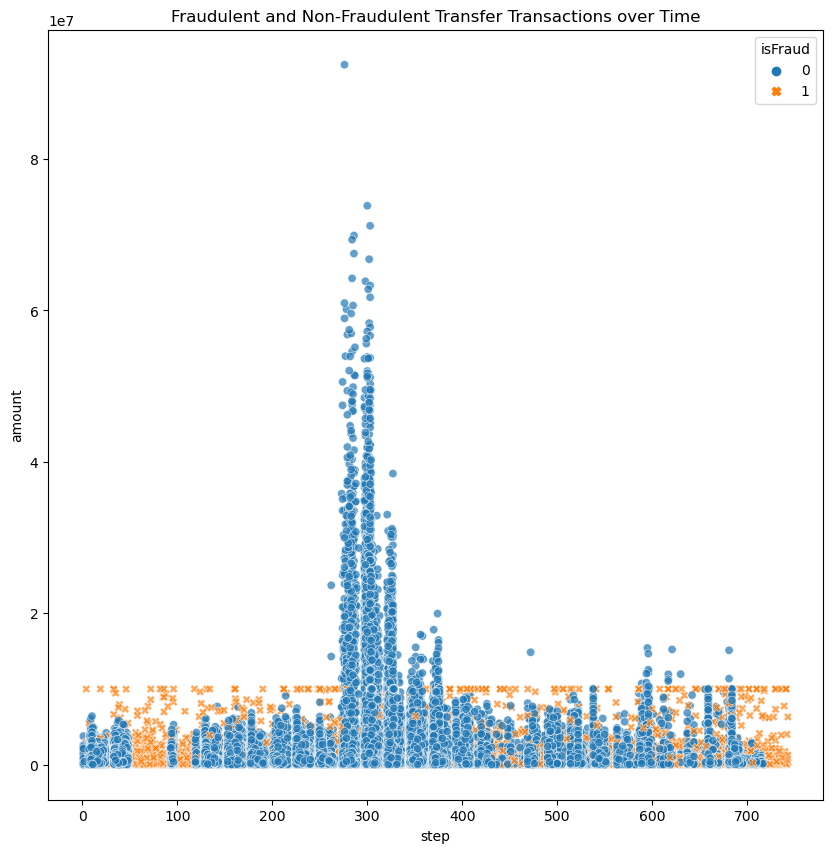

In [97]:
# seperating where type = TRANSFER
df_containing_transfer_fraud = df_containing_fraud[df_containing_fraud['type'] == 'TRANSFER']

# creating 50000 samples
random_sample_transfer = df_containing_transfer_fraud.sample(500000, random_state=42)

# building scatterplot
sns.scatterplot(data=random_sample_transfer, x="step", y='amount', alpha=0.7, style='isFraud', hue='isFraud')
plt.title('Fraudulent and Non-Fraudulent Transfer Transactions over Time')

This chart depicts a random sample of 50000 rows from the df_containing_transfer_fraud dataframe of both fraudulent and non-fraudlent transfer transactions over time. Interestingly it appears that fraudulent transfer transactions occur only between 0-10,000,000; with a substanital amount of fraudulent transactions specifically at the 10,000,000 mark.

In [98]:
non_fraud_transfer = df_containing_transfer_fraud[df_containing_transfer_fraud['isFraud'] == 0]
true_fraud_transfer = df_containing_transfer_fraud[df_containing_transfer_fraud['isFraud'] == 1]

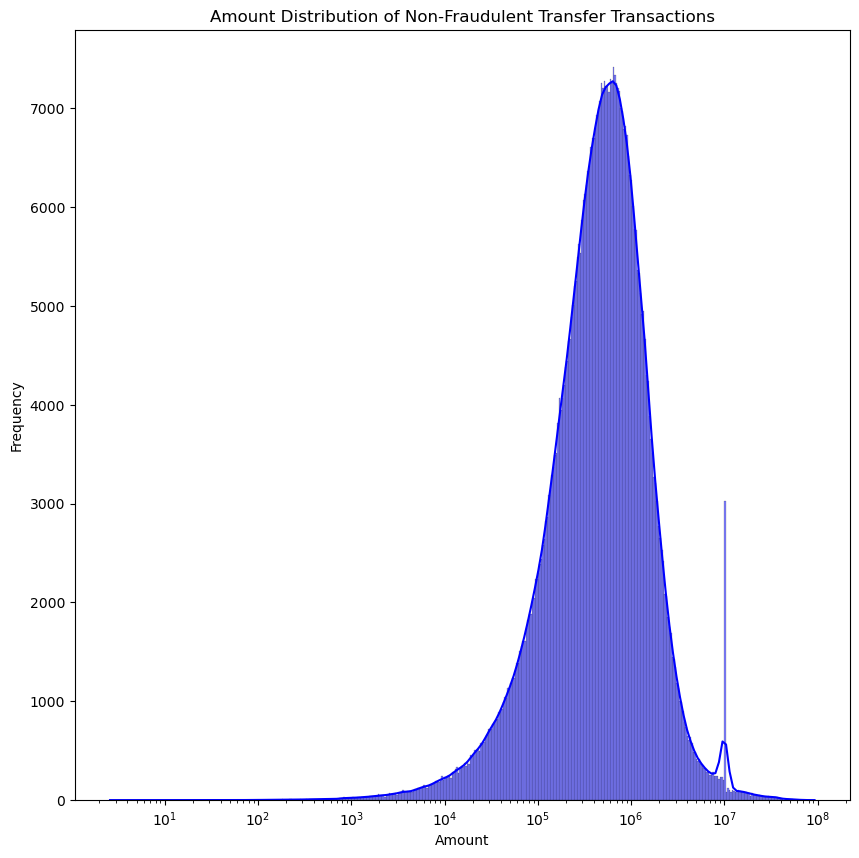

In [99]:
sns.histplot(non_fraud_transfer['amount'], kde=True, color='blue', log_scale=True)

plt.title('Amount Distribution of Non-Fraudulent Transfer Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

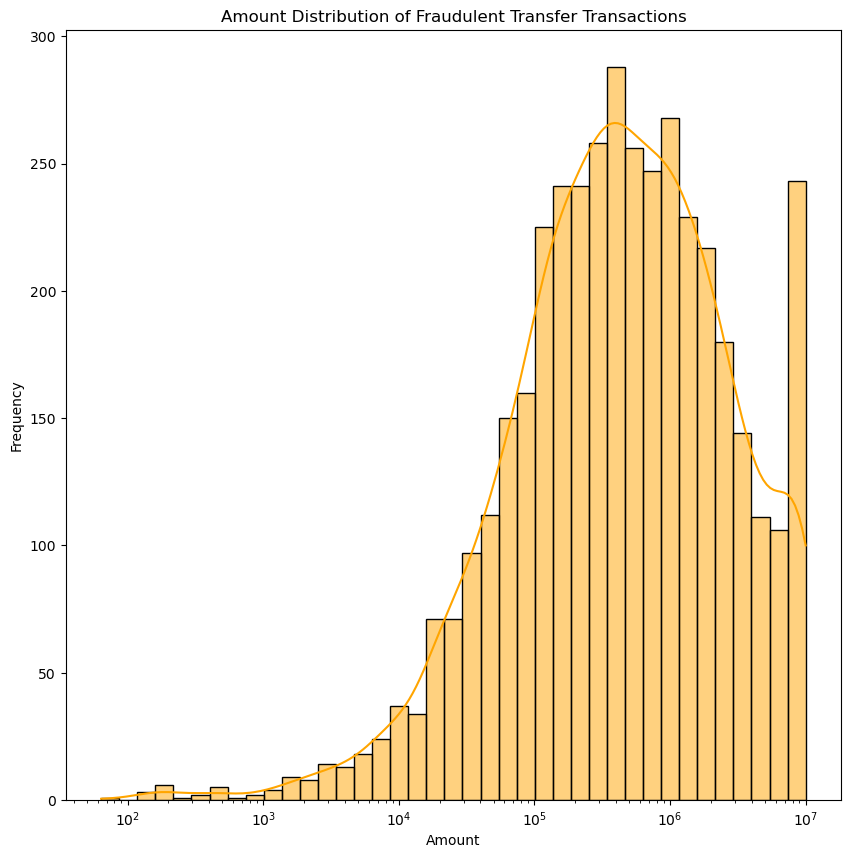

In [100]:
sns.histplot(true_fraud_transfer['amount'], kde=True, color='orange', log_scale=True)

plt.title('Amount Distribution of Fraudulent Transfer Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

It appears that for both Cash-out and Transfer transactions, a large amount of fraudulent transactions occur at the 10,000,000 mark. I'll zoom into both fraudulent and non-fraudulent transactions at the 10,000,000 amount to determine any differences. And then I'll see if these patterns can be generalizable to other amount values.

## 10,000,000 amount transactions

In [101]:
# transactions within df_containing_fraud, where amount is 10000000
transaction_amounts_10e7 = df_containing_fraud[df_containing_fraud['amount'] == 10000000]

In [102]:
# among transactions where 10,000,000 amount, 287 are fraud
transaction_amounts_10e7['isFraud'].value_counts()

isFraud
0    2920
1     287
Name: count, dtype: int64

## Transfer transaction inspection

In [103]:
# 145 of the 287 fraudulent transactions are Transfer transactions
# looks like there may be a pattern in 'oldbalanceDest' and 'newbalanceDest'

transaction_amounts_10e7[(transaction_amounts_10e7['isFraud'] == 1) & (transaction_amounts_10e7['type'] == 'TRANSFER')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1,0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1,0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1,0
1030559,72,TRANSFER,10000000.0,C53057884,18594065.09,8594065.09,C588547519,0.0,0.0,1,0
1030661,82,TRANSFER,10000000.0,C1237313447,10987591.59,987591.59,C1468356154,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.0,C412961249,11314660.84,1314660.84,C253674970,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.0,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0


In [104]:
transaction_amounts_10e7[transaction_amounts_10e7['oldbalanceDest'] == transaction_amounts_10e7['newbalanceDest']]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1,0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1,0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1,0
1030559,72,TRANSFER,10000000.0,C53057884,18594065.09,8594065.09,C588547519,0.0,0.0,1,0
1030661,82,TRANSFER,10000000.0,C1237313447,10987591.59,987591.59,C1468356154,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.0,C412961249,11314660.84,1314660.84,C253674970,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0
6362578,741,TRANSFER,10000000.0,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0
6362580,741,TRANSFER,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0


## Investigating if this relationship exists across all transfer transactions

In [105]:
# moving back to all fraudulent transactions for Transfer type, 4097 fraudulent transactions in total

df_transfer[df_transfer['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [106]:
# comparing the two columns
# for values where the columns are matches, there are 4068 fraudulent transactions

old_dest_equals_new_dest = df_transfer[df_transfer['oldbalanceDest'] == df_transfer['newbalanceDest']]
old_dest_equals_new_dest['isFraud'].value_counts()

isFraud
1    4068
0     106
Name: count, dtype: int64

Among transfer transactions, when 'oldbalanceDest' is equal to 'newBalanceDest', there are 4068 fraudulent transactions. The total fraud count in transfer transactions is 4097. Meaning that this relationship captures 99.3% (misses 29 other fraudulent transactions) of the fraudulent transfer transactions.

## Cash-out inspection

In [107]:
# 142 of the 287 fraudulent transaction are cash-out transactions
# looks like there may be a pattern in 'amount' and 'oldbalanceOrg'

fraudulent_cash_out_transactions_10e7 = transaction_amounts_10e7[(transaction_amounts_10e7['isFraud'] == 1) & (transaction_amounts_10e7['type'] == 'CASH_OUT')]
fraudulent_cash_out_transactions_10e7

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4441,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.0,C766681183,0.00,9941904.21,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.0,C1622860679,504326.62,10342417.90,1,0
586312,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.0,C1379703840,0.00,10000000.00,1,0
1030560,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.0,C1089455271,81810.42,10081810.42,1,0
1030662,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.0,C615227407,373274.84,10373274.84,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362529,736,CASH_OUT,10000000.0,C1842402025,10000000.0,0.0,C1291939349,0.00,10000000.00,1,0
6362577,741,CASH_OUT,10000000.0,C421958672,10000000.0,0.0,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.0,0.0,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.0,0.0,C1866259073,0.00,10000000.00,1,0


In [108]:
origin_old_balance_10e7 = transaction_amounts_10e7[transaction_amounts_10e7['oldbalanceOrg'] == 10000000]
origin_old_balance_10e7

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4441,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.0,C766681183,0.00,9941904.21,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.0,C1622860679,504326.62,10342417.90,1,0
586312,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.0,C1379703840,0.00,10000000.00,1,0
1030560,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.0,C1089455271,81810.42,10081810.42,1,0
1030662,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.0,C615227407,373274.84,10373274.84,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362529,736,CASH_OUT,10000000.0,C1842402025,10000000.0,0.0,C1291939349,0.00,10000000.00,1,0
6362577,741,CASH_OUT,10000000.0,C421958672,10000000.0,0.0,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.0,0.0,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.0,0.0,C1866259073,0.00,10000000.00,1,0


In [109]:
origin_old_balance_10e7.equals(fraudulent_cash_out_transactions_10e7)

True

In [110]:
# checking in df_containing_fraud if there are other rows where oldbalanceOrg is equal to 10,000,000

df_containing_fraud[df_containing_fraud['oldbalanceOrg'] == 10000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4441,4,CASH_OUT,10000000.0,C351297720,10000000.0,0.0,C766681183,0.00,9941904.21,1,0
481251,19,CASH_OUT,10000000.0,C2050703310,10000000.0,0.0,C1622860679,504326.62,10342417.90,1,0
586312,33,CASH_OUT,10000000.0,C29118015,10000000.0,0.0,C1379703840,0.00,10000000.00,1,0
1030560,72,CASH_OUT,10000000.0,C1438388258,10000000.0,0.0,C1089455271,81810.42,10081810.42,1,0
1030662,82,CASH_OUT,10000000.0,C1079335762,10000000.0,0.0,C615227407,373274.84,10373274.84,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362529,736,CASH_OUT,10000000.0,C1842402025,10000000.0,0.0,C1291939349,0.00,10000000.00,1,0
6362577,741,CASH_OUT,10000000.0,C421958672,10000000.0,0.0,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.0,C1647199421,10000000.0,0.0,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.0,C677394894,10000000.0,0.0,C1866259073,0.00,10000000.00,1,0


We've widdled down transactions with the amount of 10,000,000. We then found cash-out transactions with the amount of 10,000,000, and then found that all of these transactions were fraudulent. It appears that these transactions have one thing in common, the oldbalanceOrg is equal to the amount for each transaction. I wonder if this is a generalizable pattern to all cash-out transactions regardless of amount. Where if oldbalanceOrg == amount, therefore isFraud is True.

In [111]:
# moving back to all fraudulent transactions for cash-out type, 4116 fraudulent transactions in total

df_cash_out[df_cash_out['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [112]:
# returning all rows where 'amount' is equal to 'oldbalanceOrg' among cash-out transactions
# finding value counts of fraud vs no fraud
amount_equals_oldbalance = df_cash_out[df_cash_out['amount'] == df_cash_out['oldbalanceOrg']]

amount_equals_oldbalance['isFraud'].value_counts()

isFraud
1    4091
Name: count, dtype: int64

In [113]:
# value count of non-fraud vs fraud transactions in cash-out type
df_cash_out['isFraud'].value_counts()

isFraud
0    2233384
1       4116
Name: count, dtype: int64

Among cash-out transactions, when 'amount' is equal to 'oldbalanceOrg', there are ONLY fraudulent transactions (4091). The total fraud count in cash-out transactions is 4116. Meaning that this relationship captures 99.4% (misses 25 other fraudulent transactions) of the fraudulent cash-out transactions.

## Step analysis

<Axes: xlabel='type', ylabel='step'>

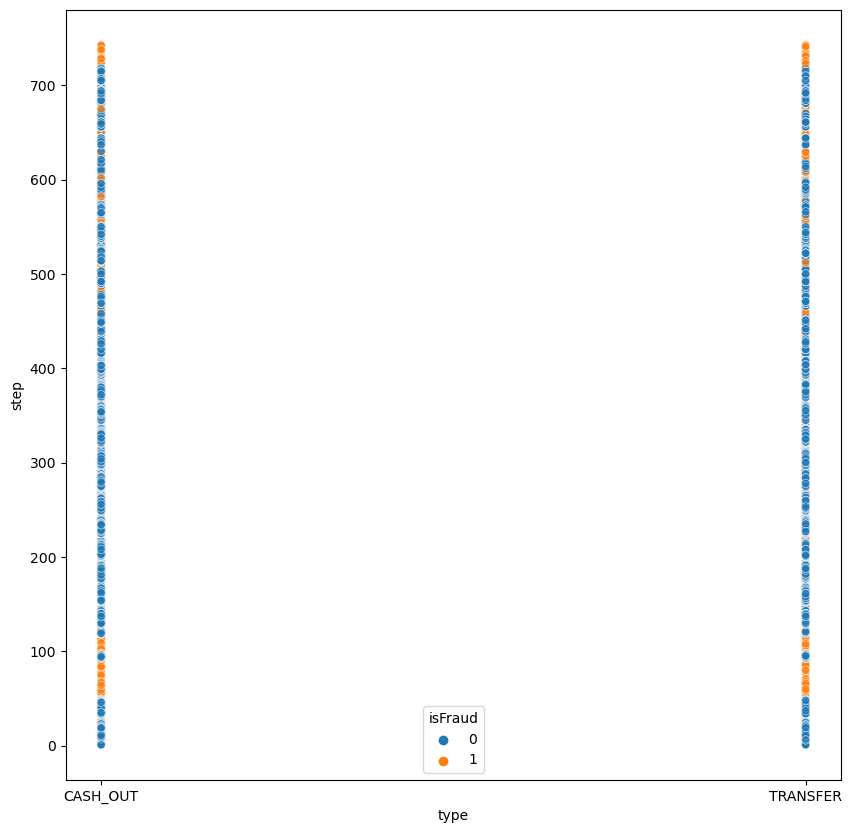

In [116]:
sns.scatterplot(data=random_sample, y="step", x='type', hue='isFraud', alpha=0.7)

Appears to be a slight pattern emerging across time. For both CASH_OUT and TRANSFER types, there is are many fraudulent transactions occuring between the interval ~50 - 110 and + 720.

## Next steps

In the 02clean.ipynb file, I will drop columns, create new columns around these discovered relationships, transform and encode the new dataframe, and lastly export the file to data/processed folder; where it will remain ready for the following modeling step.